# Swanalytics - Swan Telecom 

Using Decision Trees and Random Forest to make predictions on customers most likely to churn 

In [100]:
# imports
# Core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time  # For timing model runs

# Sklearn - model selection & evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics  # Optional if you're using things like metrics.classification_report

# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

# Random Forest & Extra Trees
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.model_selection import StratifiedKFold

In [101]:
df = pd.read_csv('https://raw.githubusercontent.com/gdiwa23/Swanalytics/refs/heads/main/1%20Project%20Data%20-%20Telco_Churn.csv')

### first look at data

In [102]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [103]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [104]:
df.shape

(7043, 31)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [106]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [107]:
df.isnull().sum() / len(df) * 100

CustomerID            0.000000
Count                 0.000000
Country               0.000000
State                 0.000000
City                  0.000000
Zip Code              0.000000
Lat Long              0.000000
Latitude              0.000000
Longitude             0.000000
Gender                0.000000
Senior Citizen        0.000000
Partner               0.000000
Dependents            0.000000
Tenure Months         0.000000
Phone Service         0.000000
Multiple Lines        0.000000
Internet Service      0.000000
Online Security       0.000000
Online Backup         0.000000
Device Protection     0.000000
Tech Support          0.000000
Streaming TV          0.000000
Streaming Movies      0.000000
Contract              0.000000
Paperless Billing     0.000000
Payment Method        0.000000
Monthly Charges       0.000000
Total Charges         0.000000
Churn Label           0.000000
Churn Value           0.000000
Churn Reason         73.463013
dtype: float64

In [108]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

*  After a first look at the data, the following actions must be taken to clean up the df, in preparation for train test splitting

In [109]:
df = df.drop(columns=["Count","City","Country","State","Lat Long","Churn Label","Churn Reason"]) # drop columns we don't want to use 

In [110]:
# Total charges needs to be cast to float

df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce') # casts to float
df['Total Charges'] = df['Total Charges'].fillna(0) # found NaN values after casting -> fill with 0
df['Total Charges'].isnull().sum() # check = 0 nulls

0

In [111]:
df.set_index('CustomerID', inplace=True) # set as index, checked all are unqiue first

### Train test split

In [112]:
# set feature columns
feature_cols = df.columns.drop('Churn Value')
#feature_cols

In [113]:
# set X and y 
X = df[feature_cols].copy()  # features
y = df['Churn Value']   

In [114]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [115]:
# sanity checks
print(f'Train match: {len(X_train)==len(y_train)}')
print(f'Test match: {len(X_test)==len(y_test)}')

Train match: True
Test match: True


### Data Cleaning 

In [116]:
# func for cleaning 
def clean_data(df):

  assert isinstance(df, pd.DataFrame), 'Parameter needs to be a DataFrame'
    
  df_clean = df.copy() # df is X


  # OHE the service column into Fibre Optic or DSL - 0 in both indicates no internet service
    
  service_dummies = pd.get_dummies(df_clean['Internet Service'], prefix='Service', drop_first=True, dtype=int)
  df_clean = pd.concat([df_clean, service_dummies], axis=1)
  df_clean = df.drop(columns=['Internet Service'])

  df_clean = pd.get_dummies(df_clean, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype = int)
  df_clean = pd.get_dummies(df_clean, columns=['Payment Method'], drop_first=True, prefix='Payment_Method', dtype=int)


    
  # Label Encoding

  df_clean['Gender'] = df_clean['Gender'].map({'Female': 0, 'Male':1, 0:0, 1:1})
  df_clean['Senior Citizen'] = df_clean['Senior Citizen'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  df_clean['Partner'] = df_clean['Partner'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  df_clean['Dependents'] =  df_clean['Dependents'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  df_clean['Phone Service'] = df_clean['Phone Service'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  df_clean['Multiple Lines'] = df_clean['Multiple Lines'].map({'No': 0, 'Yes':1,'No phone service':0, 0:0, 1:1})

  df_clean['Online Security'] = df_clean['Online Security'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
  df_clean['Online Backup'] = df_clean['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
  df_clean['Device Protection'] = df_clean['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
  df_clean['Tech Support'] = df_clean['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})

  #TV - No internet service has been combined with No
  df_clean['Streaming TV'] = df['Streaming TV'].replace(['No internet service', 'No'], 'No')
  df_clean['Streaming TV'] = df_clean['Streaming TV'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  # Movies- No internet service has been combined with No
  df_clean['Streaming Movies'] = df['Streaming Movies'].replace(['No internet service', 'No'], 'No')
  df_clean['Streaming Movies'] = df_clean['Streaming Movies'].map({'No': 0, 'Yes':1, 0:0, 1:1})
  # Paperless Billing
  df_clean['Paperless Billing'] = df_clean['Paperless Billing'].map({'No': 0, 'Yes':1, 0:0, 1:1})




  return df_clean

#### clean the data using the function

In [117]:
X_train_fe = clean_data(X_train)

In [118]:
X_test_fe = clean_data(X_test)

In [119]:
## no churn DATA TO PREDICT ON 
df_nochurn = df[df['Churn Value'] ==  0]
df_nochurn = df_nochurn.drop(columns=["Churn Value"])

In [120]:
df_nochurn = df_nochurn[feature_cols]
df_nochurn_fe = clean_data(df_nochurn)

In [121]:
# sanity checks - just to make sure all good

print(f'Train post split match: {len(X_train_fe)==len(y_train)}')
print(f'Test post split match: {len(X_test_fe)==len(y_test)}\n')

print(f'Train post data cleaning match: {X_train_fe.shape[0] == X_train.shape[0]}')
print(f'Test post data cleaning match: {X_test_fe.shape[0] == X_test.shape[0]}\n')

print(f'Churn data post cleaning match: {df_nochurn_fe.shape[0]==df_nochurn.shape[0]}')


Train post split match: True
Test post split match: True

Train post data cleaning match: True
Test post data cleaning match: True

Churn data post cleaning match: True


### Decision Tree + Grid Search

* Start with the initial decision tree and use as benchmark.

* The decision tree achieves a solid 79% accuracy on the training set, but deeper analysis reveals that while precision is acceptable at 68%, recall is significantly lower at 42%. This suggests the model is better at correctly identifying churners when it predicts churn BUT misses a large portion of actual churners. Improving recall and precision are key in order to maximise the models ability to predict churners and optimise Market Team's efforts in targetting churners.
* With a limited slot of just Top 500 to deliver to the Marketing Team, we need to focus on Precision and Recall as metrics to ensure that the model captures customers who are most likely to churn.
* This leads into the use of grid search to optimise parameters


> Decision Tree Key Metrics: Train Set  
> 
> Accuracy:   0.7903798367057153  
> Precision:  0.6801705756929638  
> Recall:     0.42001316655694537  
> F1:         0.5193325193325193

In [122]:
# first decision tree
dt = DecisionTreeClassifier(max_depth=4, # initially 3, but changed to 4 and saw improvement
                            random_state=2)
dt.fit(X_train_fe, y_train) #fit data to model

DecisionTreeClassifier(max_depth=4, random_state=2)

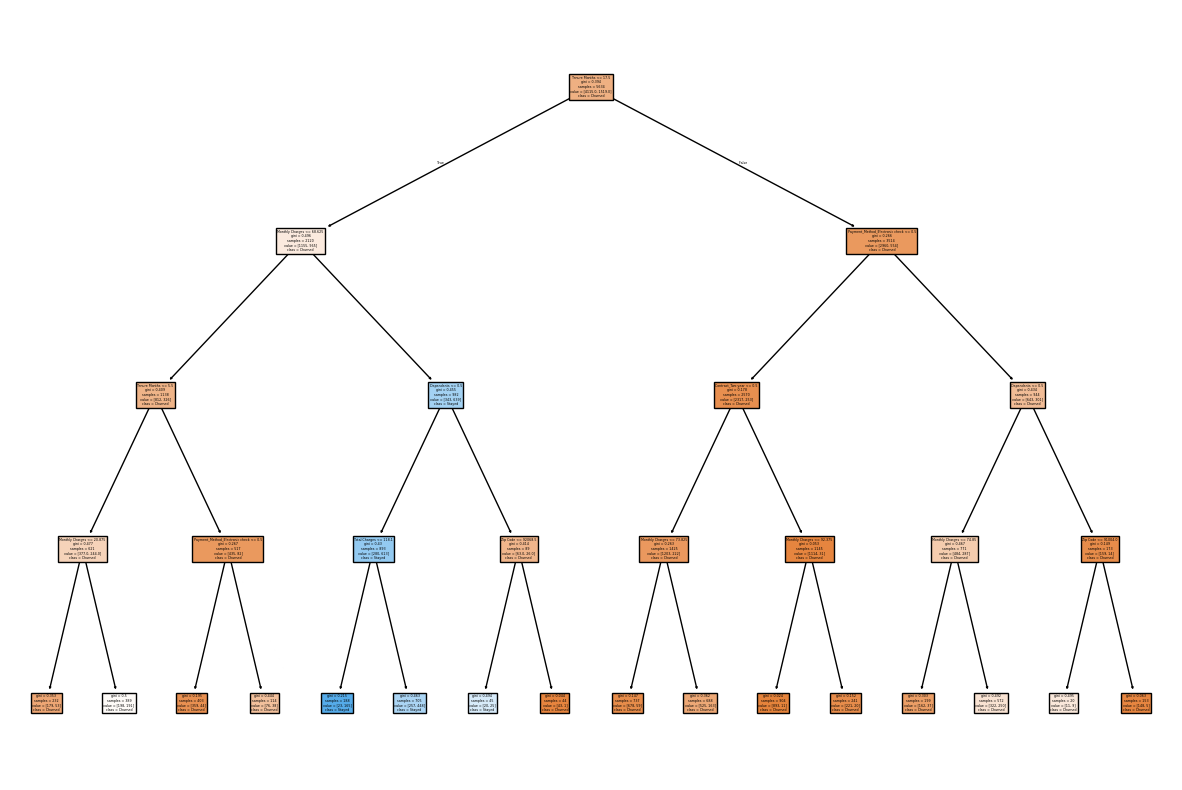

In [123]:
# plot the first tree
fig = plt.figure(figsize=(15,10))
tree_1 = tree.plot_tree(dt,
                   feature_names=X_train_fe.columns,
                   class_names=['Churned', 'Stayed'],
                   filled=True)
plt.show()

In [124]:
## accuracy score ## 0.79 and 0.79 , not bad
print(f'Score on training set: {dt.score(X_train_fe, y_train)}')
print(f'Score on testing set: {dt.score(X_test_fe, y_test)}')

Score on training set: 0.7903798367057153
Score on testing set: 0.7998580553584103


In [125]:
def apr(y_real, y_pred):
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:   {accuracy}")
    print(f"Precision:  {precision}")
    print(f"Recall:     {recall}")
    print(f"F1:         {f1}")
    #return accuracy, precision, recall, f1

In [126]:
# Decision tree 1 key metrics 

y_pred_dt = dt.predict(X_train_fe) # add y_pred col # decision tree pred
print('Decision Tree Key Metrics: Train Set\n')
apr(y_train, y_pred_dt)

Decision Tree Key Metrics: Train Set

Accuracy:   0.7903798367057153
Precision:  0.6801705756929638
Recall:     0.42001316655694537
F1:         0.5193325193325193


#### Grid Search with DT
* To improve on the intial results of the dt, we are using grid search in order to optimise the hyperparameters used in the model
* cv = 10 , means that the grid search will cross validate across 10 slices the data 
* grid search will give us the .best_estimator_ which will be used to train the data

* The Random Forest model achieves an accuracy of 80.7%, indicating solid overall performance. With a precision of 63.8%, it reliably identifies actual churners when it predicts churn. A recall of 65.1% shows the model captures a good portion of actual churn cases, better than the decision tree. The F1 score of 64.5% reflects a balanced trade-off, making this model suitable for churn detection with moderate risk tolerance.

>  Decision Tree (+GridSearch) Key Metrics: Train Set
> * Accuracy:   0.8065317713880015
> * Precision:  0.6384764364105875
> * Recall:     0.6510862409479921
> * F1:         0.6447196870925684

In [127]:
# grid searach
grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state=2),
                                   param_grid = {'max_depth': [5, 7, 10],                   # the options you want to explore
                                  'min_samples_split': [10, 50, 100, 150, 200], # ''
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7],        # ''
                                  'max_features':[2, 3, 4, 5, 6, 7, 8, 10, 12]},      # number of features to use                       ## up max features later
                    cv = 5,              # 10 folds, cross validate 10 times
                    refit = True,         # refitting = retraining on the K folds , cross validation, swaps
                    verbose = 1,          # how much we get told about what went on in the gridsearch
                    scoring = 'recall') # changed to recall to maximise this

In [128]:
# timer, to see how long model takes to finish
now = time()

# fit the model
grid.fit(X_train_fe, y_train)     # time between pressing run and model finishing
print(f' Time in seconds: {time() - now}')

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
 Time in seconds: 26.076092004776


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [129]:
# the best version of the DT according to gridsearch -> grid.best_estimator_

dt_best_estimator = grid.best_estimator_ # train dt model on grid best estimator
dt_best_estimator.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=7, max_features=7, min_samples_leaf=3,
                       min_samples_split=10, random_state=2)

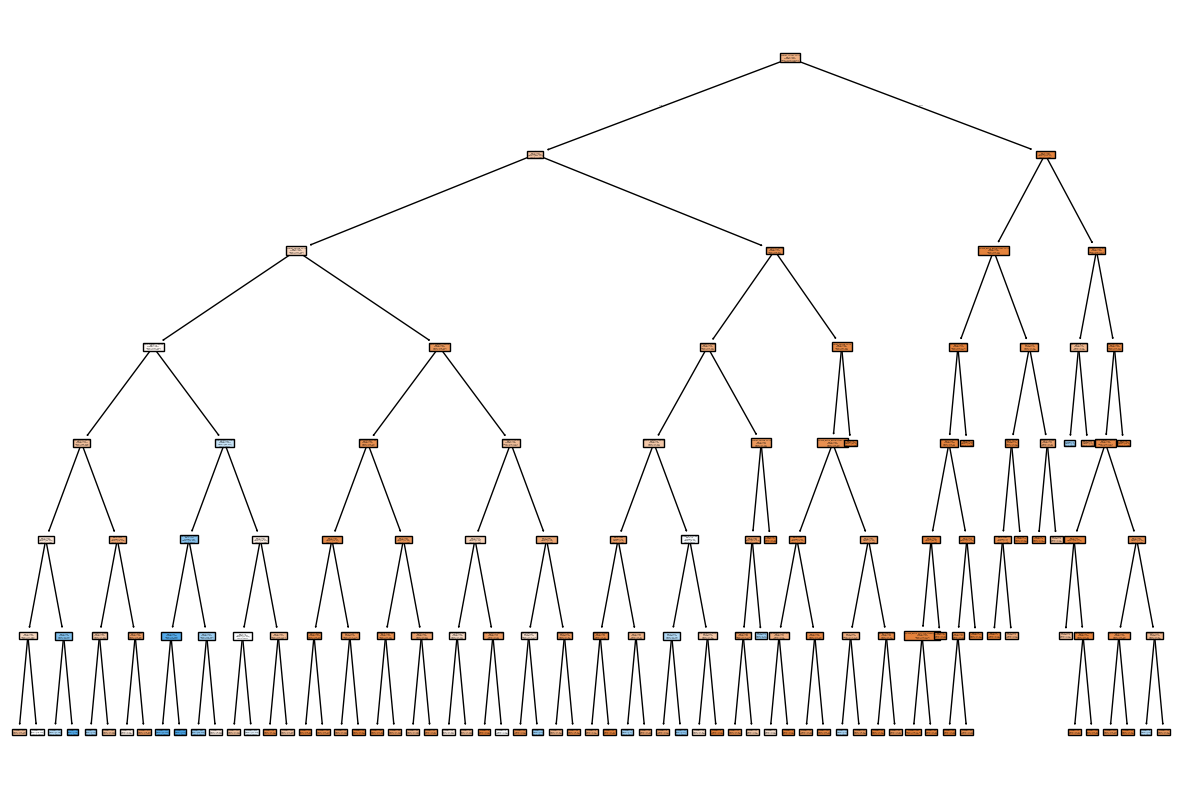

In [130]:
# dt_best_estimator tree plot

fig = plt.figure(figsize=(15,10))
thing = tree.plot_tree(dt_best_estimator,
                   feature_names=X_train_fe.columns,
                   class_names=['Churned', 'Stayed'],
                   filled=True)

In [131]:
# score for training and test

print(f'Score on training set: {dt_best_estimator.score(X_train_fe, y_train)}')
print(f'Score on testing set: {dt_best_estimator.score(X_test_fe, y_test)}')

Score on training set: 0.8065317713880015
Score on testing set: 0.7799858055358411


In [132]:
# Key metrics for Decision Tree + GridSearch

y_pred_dt_best_estimator = dt_best_estimator.predict(X_train_fe) # add y_pred col # decision tree pred
print('Decision Tree (+GridSearch) Key Metrics: Train Set\n')
apr(y_train, y_pred_dt_best_estimator)

Decision Tree (+GridSearch) Key Metrics: Train Set

Accuracy:   0.8065317713880015
Precision:  0.6384764364105875
Recall:     0.6510862409479921
F1:         0.6447196870925684


#### DT feature importances

* Feature importances informs us which features had the most influence in producing the model's predictions.
> Top 10 Feature importances 
> * Monthly Charges: 0.2597
> * Payment Method: 0.1938
> * Dependents: 0.1410
> * Contract: 0.1328
> * Paperless Billing: 0.0932
> * Tenure Months: 0.0490
> * Streaming Movies: 0.0210
> * Device Protection: 0.0189
> * Latitude: 0.0177
> * Longitude: 0.0173

In [133]:
# view feature importance ## same as before gs

dt_best_estimator.feature_importances_

# Pair feature names with their importance values
importance = list(zip(feature_cols, dt_best_estimator.feature_importances_))

# Sort the list by importance in descending order
importance_sorted = sorted(importance, key=lambda x: x[1], reverse=True)

# Display
for feature, score in importance_sorted:
    print(f"{feature}: {score:.4f}")

## most important features according to the decision tree

Monthly Charges: 0.2597
Payment Method: 0.1938
Dependents: 0.1410
Contract: 0.1328
Paperless Billing: 0.0932
Tenure Months: 0.0490
Streaming Movies: 0.0210
Device Protection: 0.0189
Latitude: 0.0177
Longitude: 0.0173
Zip Code: 0.0135
Senior Citizen: 0.0130
Phone Service: 0.0088
Internet Service: 0.0086
Tech Support: 0.0041
Streaming TV: 0.0018
Online Security: 0.0015
Multiple Lines: 0.0007
Gender: 0.0005
Partner: 0.0001
Total Charges: 0.0001
Online Backup: 0.0000


In [134]:
importance_df = pd.DataFrame(importance_sorted, columns=["feature", "score"])
importance_df['score'] = round(importance_df['score'] * 100, 2)

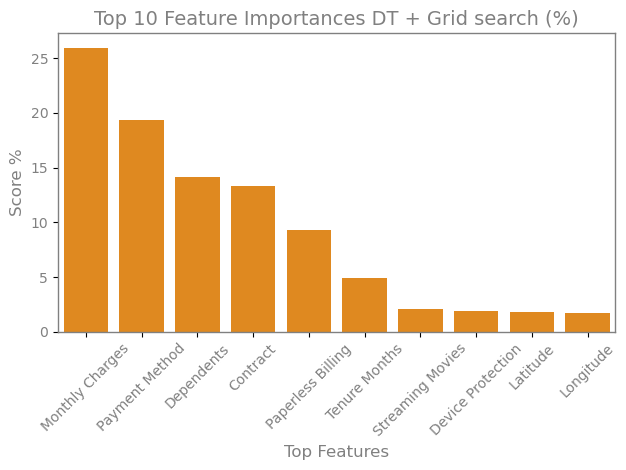

In [135]:
features_10_dt = sns.barplot(
    data=importance_df,
    x=importance_df['feature'][:10],
    y='score',
    color='darkorange'
)

for spine in features_10_dt.spines.values(): # spine is border of plot
    spine.set_color('grey')
    spine.set_linewidth(1)

plt.xticks(rotation=45, color='grey')        # x-axis tick labels grey
plt.yticks(color='grey')                      # y-axis tick labels grey
plt.xlabel('Top Features', fontsize=12, color='grey')   # x-label grey
plt.ylabel('Score %', fontsize=12, color='grey')        # y-label grey
plt.title('Top 10 Feature Importances DT + Grid search (%)', fontsize=14, color='grey')  # title grey

plt.tight_layout()
#plt.savefig('features_10_dt_.png', dpi=300, bbox_inches='tight', transparent=False) # transparent !
plt.show()

### Random Forest

* Ensemble of Decision Trees: Combines multiple decision trees to improve accuracy and control overfitting.
* Randomness: Uses bootstrap samples of data + random subsets of features at each split.

In [136]:
# initialise the model
rf = RF(n_estimators=100, max_depth=9, random_state=2) # 50 trees, 4 levels of questions

In [137]:
# fit the model
rf.fit(X_train_fe, y_train)

RandomForestClassifier(max_depth=9, random_state=2)

In [138]:
# get the  accuracy score ! cv = five k fold cross validation !
rf_score = cross_val_score(rf, X_train_fe, y_train, cv=10)

print(f'The accuracy of RF is: {rf_score}\n') # all the 10 cv folds
print(f'The mean accuracy of RF is: {rf_score.mean()}') # the mean of the 5

The accuracy of RF is: [0.80141844 0.80141844 0.78546099 0.82092199 0.78507993 0.80284192
 0.81882771 0.81172291 0.8312611  0.79396092]

The mean accuracy of RF is: 0.8052914351939332


In [139]:
rf_test_score = cross_val_score(rf, X_test_fe, y_test, cv=10)
print(f'The mean accuracy of RF is: {rf_test_score.mean()}') # the mean of the 5 -- v good accuracy and not very overfit !!

The mean accuracy of RF is: 0.8012968591691996


### Grid Search on RF 
* Grid Search on Random Forest to systematically optimise hyperparameters and improve model performance for churn prediction
* Random Forest is robust and handles but performance heavily depends on tuning parameters
* The main motivation for using Grid Search was to balance recall and precision whilst minimising overfit
* added class weight: balanced to grid search to reduce overfit

In [147]:
# stratified k fold sampling 
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [149]:
gs = GridSearchCV(
    estimator=RF(random_state=2),
    param_grid={
            'n_estimators': [100, 200], #number of trees in the forest
            'max_depth': [7,8,9],                              # [7, 9, 12]
            'min_samples_split': [30,40],                                        # [20, 50, 100]
            'min_samples_leaf': [6,8],
            'max_features': [0.65], ## make less greedy      # [0.4, 0.6, 0.7]
            'class_weight': ['balanced'] ###### added this
    },
    cv=skf,             # 5-fold cross-validation
    refit=True,         # Refits the best model on the whole training set
    verbose=1,          # Output the progress
    scoring='f1',       # changed to F1 , want to balance precision and recall , guide gs to prioritise this
    n_jobs=-1           # parallel running
)

In [150]:
now = time()
gs.fit(X_train_fe, y_train)
print(f' Time in seconds: {time() - now}')

Fitting 10 folds for each of 24 candidates, totalling 240 fits
 Time in seconds: 56.00729322433472


In [143]:
print(gs.best_score_)
print(gs.best_params_)

0.6607430636791749
{'class_weight': 'balanced', 'max_depth': 10, 'max_features': 12, 'min_samples_leaf': 5, 'min_samples_split': 50}


In [144]:
# get scores

rf_best_estimator = gs.best_estimator_
print(f'RF train accuracy: {rf_best_estimator.score(X_train_fe, y_train)}')
# Use it to score on the testing set
print(f'RF test accuracy: {rf_best_estimator.score(X_test_fe, y_test)}')

## accuracy is better than the single decision tree (0.79, train), but suggests model is overfit on test
## 0.837 , 0.777, ## less over fit

RF train accuracy: 0.8212637557685482
RF test accuracy: 0.7771469127040455


In [145]:
# Key metrics for Random + GridSearch
X_train_rf_results = X_train_fe.copy()


y_pred_rf_best_estimator = rf_best_estimator.predict(X_train_fe) # add y_pred col # decision tree pred

X_train_rf_results['y_pred'] = y_pred_rf_best_estimator

print('Random Forest (+GridSearch) Key Metrics: Train Set\n')
apr(y_train, y_pred_rf_best_estimator)


Random Forest (+GridSearch) Key Metrics: Train Set

Accuracy:   0.8212637557685482
Precision:  0.62225405921681
Recall:     0.857801184990125
F1:         0.721284251314697


In [146]:
X_test_rf_results = X_test.copy()
y_pred_rf_best_estimator = rf_best_estimator.predict(X_test_fe) # add y_pred col # decision tree pred
X_test_rf_results['y_pred'] = y_pred_rf_best_estimator
print('Random Forest (+GridSearch) Key Metrics: Test Set\n')
apr(y_test, y_pred_rf_best_estimator)

Random Forest (+GridSearch) Key Metrics: Test Set

Accuracy:   0.7771469127040455
Precision:  0.536
Recall:     0.7657142857142857
F1:         0.6305882352941177


### The final RF + GS model
* The model aims to balance overfitting while maximizing F1 (harmonizing precision and recall).
* GridSearchCV was used to systematically tune hyperparameters.
* Tree depth was limited to reduce model complexity.
* min_samples_split and min_samples_leaf were increased to encourage generalization and reduce sensitivity to noise.
* max_features was restricted to control model greediness and curb overfitting.
* class_weight='balanced' ensures fair treatment of the smaller class.
* The scoring metric was switched from accuracy to F1 to better reflect the goal of optimizing both precision and recall.



In [237]:
## various tuning results -- 

# Random Forest (+GridSearch) Key Metrics: Train Set
# 
# Accuracy:   0.8452254171104011
# Precision:  0.7943585077343039
# Recall:     0.5747202106649111
# F1:         0.6669213139801375

#Random Forest (+GridSearch) Key Metrics: Train Set

#Accuracy:   0.818778842740504
#Precision:  0.6163551401869158
#Recall:     0.8683344305464121
#F1:         0.7209620114785461

#Random Forest (+GridSearch) Key Metrics: Train Set max feat = 0.6

#Accuracy:   0.8315583954561591
#Precision:  0.6371511068334937
#Recall:     0.8716260697827518
#F1:         0.7361690297470114

#Random Forest (+GridSearch) Key Metrics: Train Set max feat = 0.75 -- v overfit tho .. 
#
#Accuracy:   0.8358182463613774
#Precision:  0.6426512968299711
#Recall:     0.8808426596445029
#F1:         0.7431269091918912

#Random Forest (+GridSearch) Key Metrics: Train Set max feat = 0.7 -- v overfit tho .. 
#
#Accuracy:   0.8374156904508342
#Precision:  0.6440516005733397
#Recall:     0.8874259381171824
#F1:         0.7464008859357697

In [238]:
# view feature importance ## same as before gs

rf_best_estimator.feature_importances_

# Pair feature names with their importance values
importance_rf = list(zip(feature_cols, rf_best_estimator.feature_importances_))

# Sort the list by importance in descending order
importance_sorted_rf = sorted(importance_rf, key=lambda x: x[1], reverse=True)

# Display
for feature, score in importance_sorted_rf:
    print(f"{feature}: {score:.4f}")

## most important features according to the decision tree

Monthly Charges: 0.2091
Contract: 0.1541
Tenure Months: 0.1488
Payment Method: 0.1096
Dependents: 0.0852
Paperless Billing: 0.0571
Zip Code: 0.0408
Longitude: 0.0307
Latitude: 0.0299
Streaming TV: 0.0122
Streaming Movies: 0.0120
Internet Service: 0.0086
Device Protection: 0.0076
Partner: 0.0071
Tech Support: 0.0062
Phone Service: 0.0055
Multiple Lines: 0.0045
Online Security: 0.0035
Senior Citizen: 0.0031
Gender: 0.0028
Total Charges: 0.0023
Online Backup: 0.0016


In [239]:
importance_rf_df = pd.DataFrame(importance_sorted_rf, columns=["feature", "score"])
importance_rf_df['score'] = round(importance_rf_df['score'] * 100, 2)

sns.barplot(data=importance_rf_df, x=importance_rf_df['feature'][:10], y='score', color = 'powderblue')
plt.xticks(rotation=45)  # Optional: rotate x-axis labels
plt.tight_layout()       # Optional: improve layout
plt.show()

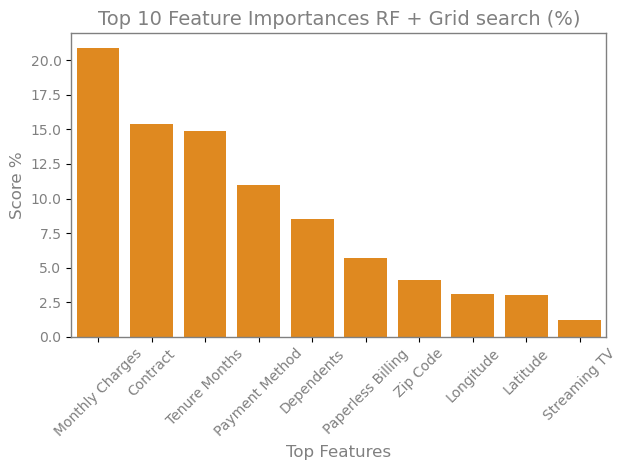

In [242]:
## graph of top 10 features according to RF + grid search model !

top10_df = importance_rf_df.iloc[:10]

features_10_rf = sns.barplot(
    data=top10_df,
    x='feature',
    y='score',
    color='darkorange'
)

for spine in features_10_rf.spines.values():
    spine.set_color('grey')
    spine.set_linewidth(1) # grey plot boarder

plt.xticks(rotation=45, color='grey')        # x-axis tick labels grey
plt.yticks(color='grey')                      # y-axis tick labels grey
plt.xlabel('Top Features', fontsize=12, color='grey') # grey
plt.ylabel('Score %', fontsize=12, color='grey') # grey
plt.title('Top 10 Feature Importances RF + Grid search (%)', fontsize=14, color='grey') # grey

plt.tight_layout()
#plt.savefig('features_10_rf.png', dpi=300, bbox_inches='tight', transparent=False)
plt.show()

## Final Predictions using RF and Grid Search
* top 500 most likely to leave the service have been identified
* using a Random Forest model train on X_train_fe, combined with Grid Search to optimise the hyperparameters 

In [241]:
# copy df
rf_results = df_nochurn_fe.copy()
# predict on no churn
rf_results[['P No Churn','P Churn']] = rf_best_estimator.predict_proba(df_nochurn_fe)

In [192]:
# add y pred to results
y_pred_rf_best_estimator = rf_best_estimator.predict(df_nochurn_fe) # add y_pred col # decision tree pred
rf_results['y_pred'] = y_pred_rf_best_estimator

In [193]:
# "y_pred","P Churn", "P No Churn"
rf_results = rf_results[["y_pred","P Churn", "P No Churn"]]
# sort values by 500 
rf_results = rf_results.sort_values(by=['P Churn'] , ascending=False)

In [195]:
rf_results.head()

,y_pred,P Churn,P No Churn
CustomerID,,,
7577-SWIFR,1,0.962074,0.037926
7439-DKZTW,1,0.958126,0.041874
5542-TBBWB,1,0.954961,0.045039
9603-OAIHC,1,0.954085,0.045915
1452-VOQCH,1,0.927896,0.072104


In [243]:
# save results to csv - top 500 churners by probability from existing customers existing customers, model trained on X_train_fe

rf_results.head(500).to_csv('top500_RF.csv', index=True)